We have access to a few datasets that provide us with information on the snow and ocean temperatures.

Set 1: CTD (conductivity-temperature-depth) profiles from the M-sites. We can use these data to identify changes in ocean water masses, mixing layer depth, and ocean temperatures for input into a model of ice thermodynamics.

Quality flags: 1 = Good, 2 = Good (Modified), 3 = Questionable, 4 = Bad, 9 = no data. 

Citation: Hoppmann, Mario; Kuznetsov, Ivan; Fang, Ying-Chih; Rabe, Benjamin (2022): Processed data of CTD buoys 2019O1 to 2019O8 as part of the MOSAiC Distributed Network. PANGAEA, https://doi.org/10.1594/PANGAEA.940320

Data paper: Hoppmann, Mario; Kuznetsov, Ivan; Fang, Ying-Chih; Rabe, Benjamin (2022): Mesoscale observations of temperature and salinity in the Arctic Transpolar Drift: a high-resolution dataset from the MOSAiC Distributed Network. Earth System Science Data, 14, 4901–4921, https://doi.org/10.5194/essd-14-4901-2022

## Notes on the data
The CTD data are *profile* data, which means that they include data for a range of depths for each date. It includes position (latitude/longitude), time, drift speed, and other variables. The instrument consists of a 100m long cable suspended from a float with 5 CTD devices attached to it. The CTD measures temperature, conductivity, and pressure directly. Temperature, depth, and salinity are what we actually need. The salinity is derived from the conductivity, while the depth is based on the water density (a function of temperature, pressure, and salinity), so the depth and salinity are derived measurements.


In [1]:
import os
# Change this path to where you download the Hoppmann et al. dataset
dataloc = '../../MOSAiC_CTD_buoys/datasets/'
os.listdir(dataloc)

['2019O1.tab',
 '2019O2.tab',
 '2019O3.tab',
 '2019O4.tab',
 '2019O5.tab',
 '2019O6.tab',
 '2019O7.tab',
 '2019O8.tab']

In [3]:
import pandas as pd
file = dataloc + '2019O1.tab'
# First we need to see when the table starts: the 
# metadata is given within /* and */ markers.
# This code goes through the text file line by line and finds the symbol
# marking the end of the metadata.
with open(file) as f:
    for idx, line in enumerate(f.readlines()):
        if '*/' in line:
            break
print('Last line: ', idx)

Last line:  48


In [4]:
# You can do this for each of the buoys
# Not all of them cover the period we're interested in
buoy = '2019O1'

columns = ['Date/Time', 'Latitude', 'Longitude', 'Drift vel [m/s]',
           'Submerged', 'TTT [°C]', 'Gear ID', 'Cond [mS/cm]', 'Temp [°C]',
           'Press [dbar]', 'Depth water [m]', 'Sal', 'QF conduct', 
           'QF water temp', 'QF water press', 'QF water depth', 'QF sal', 'Flag buoy']

df = pd.read_table(dataloc + buoy + '.tab', skiprows=idx+2, names=columns,
                sep='\t')
df.rename({'Date/Time': 'datetime',
          'Latitude': 'latitude',
           'Longitude': 'longitude'}, axis=1, inplace=True)
df['datetime'] = pd.to_datetime(df.datetime.values)

GearID lets you select individual CTDs along the cable. You can see that the depth varies somewhat, which is expected as the ice thickness changes and as the cable is hanging freely - it doesn't hang perfectly straight down. The pivot table method lets you sort the table in useful ways. Here, I am selecting the depth and arranging it so that the rows are individual times and the columns are each of the 5 CTDs on the cable.

In [4]:
# The pivot table method is useful for multidimensional data. You choose a variable
# to be the index, which ones to line up for columns, and which to place in the table body.
# You'll need the depth data (shown here) to do the numerical integration of the temperature data.
df.pivot_table(index='datetime', columns='Gear ID', values='Depth water [m]')

Gear ID,1,2,3,4,5
datetime,,,,,
2019-10-05 05:11:40,NaN,NaN,-49.66,-74.63,-99.32
2019-10-05 05:13:40,NaN,NaN,-49.66,-74.63,-99.32
2019-10-05 05:15:40,NaN,NaN,-49.66,-74.63,-99.33
2019-10-05 05:17:40,NaN,NaN,-49.66,-74.63,-99.32
2019-10-05 05:19:00,-9.69,-19.59,-49.66,-74.63,-99.32
...,...,...,...,...,...
2020-08-05 09:51:40,-8.76,-18.48,-47.94,-72.65,NaN
2020-08-05 09:53:40,-8.75,-18.43,-47.81,-72.50,NaN
2020-08-05 09:55:40,-8.73,-18.38,-47.76,-72.37,NaN


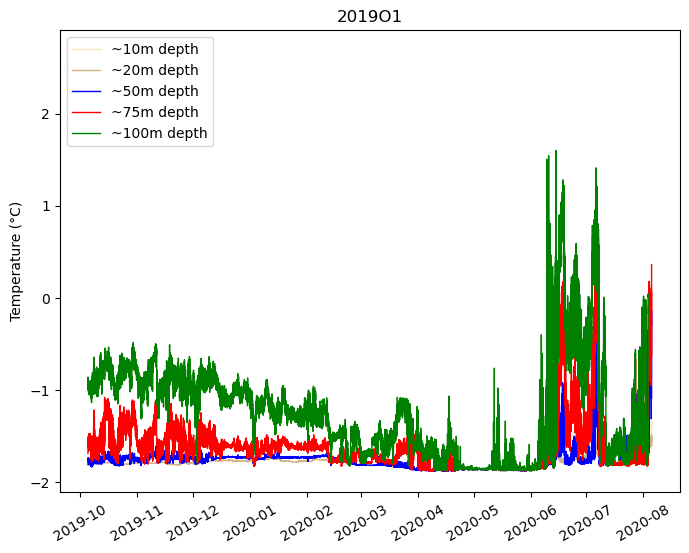

In [21]:
import matplotlib.pyplot as plt
ts = slice('2020-06-01', '2020-07-31')

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title(buoy)
for CTD_ID, approx_depth, color in zip(range(1, 6), [10, 20, 50, 75, 100],
                                       ['bisque', 'tan', 'blue', 'red', 'green']):
    ax.plot(df.loc[df['Gear ID'] == CTD_ID].set_index('datetime')['Temp [°C]'], color=color, lw=1, label='~{d}m depth'.format(d=approx_depth))
plt.xticks(rotation=30);
ax.set_ylabel('Temperature (°C)')
ax.legend()

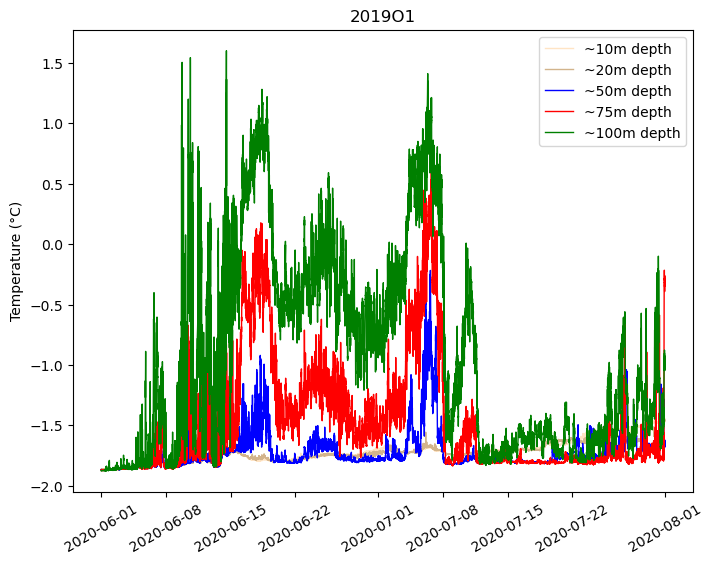

In [22]:
import matplotlib.pyplot as plt
ts = slice('2020-06-01', '2020-07-31')

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title(buoy)
for CTD_ID, approx_depth, color in zip(range(1, 6), [10, 20, 50, 75, 100],
                                       ['bisque', 'tan', 'blue', 'red', 'green']):
    ax.plot(df.loc[df['Gear ID'] == CTD_ID].set_index('datetime').loc[ts, 'Temp [°C]'], color=color, lw=1, label='~{d}m depth'.format(d=approx_depth))
plt.xticks(rotation=30);
ax.set_ylabel('Temperature (°C)')
ax.legend()

# Next steps
The temperature and salinity structure of the upper ocean tells you a lot about its dynamics. I'm having you look at the average temperature first, as that is fairly straightforward to compute and will tell us some useful things. More important, though, is the *stability* of the upper ocean. That's a more complicated idea and calculation, so once you are comfortable with reading in this data and doing some basic calculations we'll go over the next step.